**Name: Isaac Huang  
Student ID: 23019722  
File name: lab02.ipyn**

# CITS5508 Machine Learning - Semester 1, 2022

### Contents of Lab 2:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Cleaning and Visualisation
4. Feature Scaling
5. Support Vector Machine Classifier
6. Stochastic Gradient Descent Classifier
7. Conclusion
8. References

### Data Set Information:
- s: Sugi forest
- h: Hinoki forest
- d: Mixed deciduous forest
- o: Other (non-forest land)
- b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths 
- pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values minus actual spectral values for the 's' class (b1-b9)
- pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values minus actual spectral values for the 'h' class (b1-b9)

## 1. Import Necessary Libraries   
Importing all the Python libraries needed for lab2, such as numpy, pandas, sklearn, matplotlib and seaborn.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## 2. Read in and Explore the Data 
Reading in the training and testing data, and using appropriate functions to display and explore the attributes.
- We can see there are 325 instances and 28 attributes in the training data, and 198 instances and 28 attributes in the testing data. 
- We also have a look at the first 5 instances to have an idea of what each instance looks like.

In [4]:
train_df = pd.read_csv('training.csv')
print(train_df.shape)
train_df.head()

(325, 28)


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [5]:
test_df = pd.read_csv('testing.csv')
print(test_df.shape)
test_df.head()

(198, 28)


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


### Summary of The Training Data   
Having a look at the data type, max, min, mean, standard deviation, unique and main elements of each attributes.
- We can see there are 4 labels in class, which are the targets we're going to classify and predict.
- Lable 's' has the most intances, 136 out of 325 instances. 
- The first 9 attributes are in intgers and the rest are in floats.

In [6]:
train_df.info()
print(train_df.describe(include = "all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

### Missing or Duplicated Training Values    
Even though the last code has shown the Non-Null Counts, we'll use the following 2 functions to show the overall missing and duplicated value numbers instead of checking the count numbers one by one.
- We can see there are no missing values in our training data.
- We can see there are no duplicated rows in our training data.

In [7]:
train_df.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

## 3. Data Cleaning and Visualisation
In this lab, we will only use b1 - b9, the ASTER image bands containing spectral information in the green, red, and near infrared wavelengths, as our main attributes to build our classifiers and remove the rest of the columns whose names begin with 'pred_minus_obs'. Then, we will use some plots to show the correlations among / between the attributes and class.

### Imbalanced Training Data Set
We removed the columns we don't need first. 
- In the plot below, we can see the number of instances for our 4 class labels are imbalanced. 
- Labels 'o' and 'h' have much less intances than lables 's' and 'd', less than half of what 's' or 'd' has.

s    136
d    105
o     46
h     38
Name: class, dtype: int64


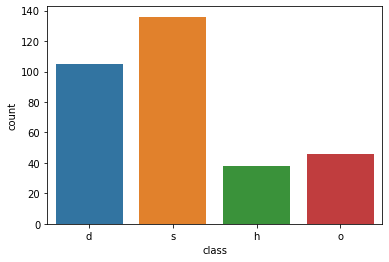

In [9]:
for name in train_df.head(0):
    if "pred_minus_obs" in name:
        del train_df[name]
        
for name in test_df.head(0):
    if "pred_minus_obs" in name:
        del test_df[name]
        
print(train_df['class'].value_counts())
sns.countplot(x='class', data=train_df)
plt.show()

### Attribute Correlations and Distributions   
Here, we use heatmap and scatter matrix to show the correlations and distributions among the attributes.

- From the histograms in the second plot below, we can see, apart from b7, all the other distributions are skewed. This will affect which feature scaler we choose later.
- Also, since b1 - b9 only contain the spectral information, we can't really see much information in other plots.

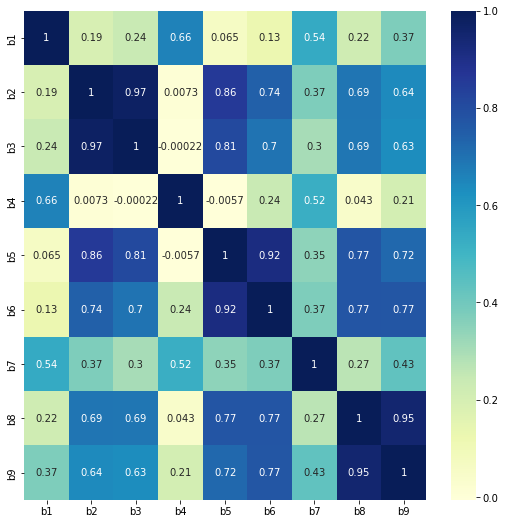

In [10]:
fig=plt.figure(figsize=(9,9))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

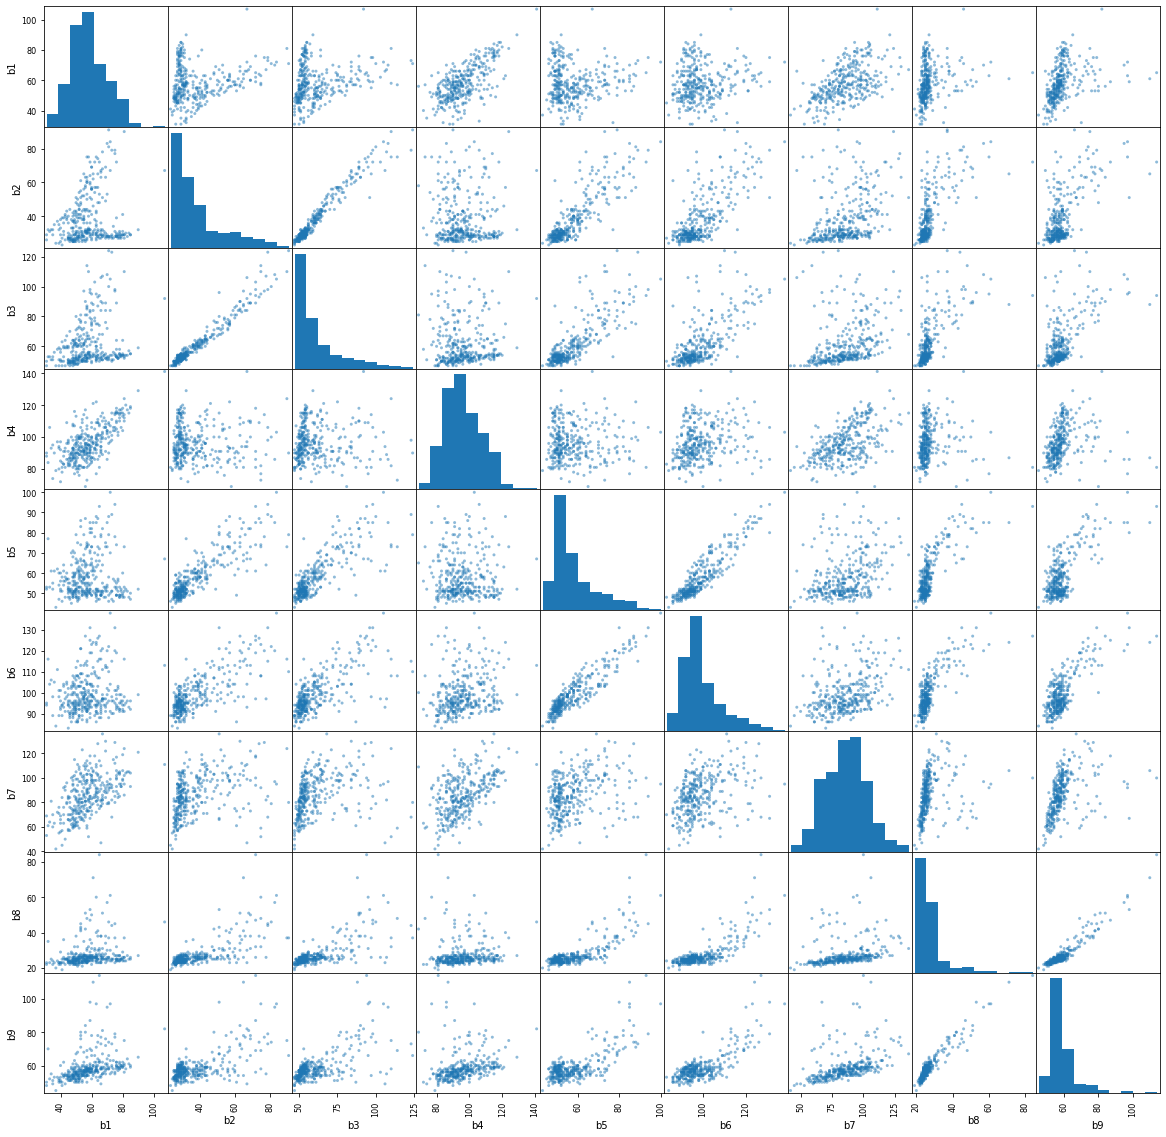

In [11]:
features = train_df.columns[1:]
scatter_matrix(train_df[features], figsize=(20.0,20.0))
plt.show()

### Data Range by Labels
- Using barplots to show the data range of b1-b9 among labls, 'd', 's', 'h' and 'o'.

- We can see some label has higher or lower b[ i ] values than others.

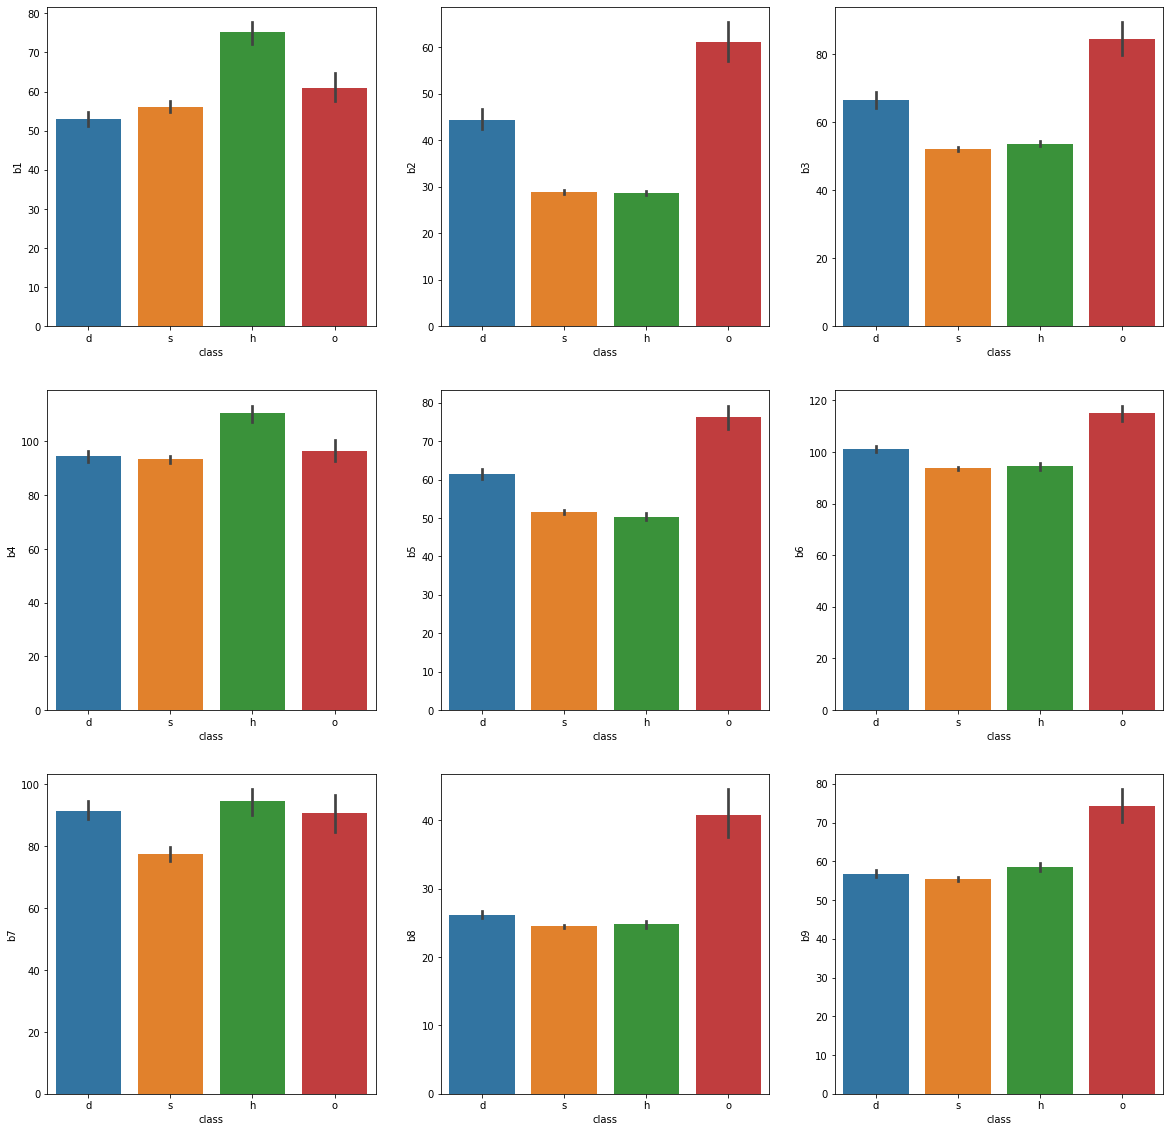

In [12]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))

for i in range(0, 9):
    sns.barplot(x='class', y=features[i], data=train_df, ax=axs[i//3, i%3])

## 4. Feature Scaling   
MinMaxScaler is used here for the reasons below:
- We know b1-b9 are spectral information in the green, red, and near infrared wavelengths from the data description, so we know the min. is the lower boundary of green wavelength and the max. is the upper boundary of near infrared wavelength.
- From the histograms in section 3, apart from b7, all the other attributes are skewed distributed. More often, StandardScaler is used for the attributes that follow a normal distribution.    

Hence, we chose MinMaxScaler here.


In [13]:
scaler = MinMaxScaler()

x = train_df.columns[1:]
y = train_df.columns[:1]

train_df[x] = scaler.fit_transform(train_df[x])
test_df[x] = scaler.transform(test_df[x])

train_df.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,0.473684,0.411765,0.272727,0.638889,0.456140,0.509091,1.000000,0.184615,0.318841
1,s,0.473684,0.073529,0.051948,0.416667,0.122807,0.254545,0.425532,0.107692,0.202899
2,s,0.421053,0.044118,0.038961,0.361111,0.105263,0.145455,0.414894,0.107692,0.173913
3,d,0.421053,0.279412,0.207792,0.388889,0.403509,0.454545,0.734043,0.138462,0.202899
4,s,0.197368,0.058824,0.038961,0.194444,0.140351,0.127273,0.361702,0.107692,0.159420


## 5. Support Vector Machine Classifier
The two main hyperparameters we chose to tune are the 'kernel' and the 'C'. These two affect the training and the result of this data set the most.
- Hyperparameter 'kernel' specifies which kernel type to be used in the algorithm. Here, we tried 'linear', 'poly' and 'rbf'.
- Hyperparameter 'C' is the regularization parameter. The default value is 1.0. Here, we tried 0.1, 1, 5 and 10 first.
- Hyperparameter 'gamma' only affects kernal ‘rbf’, ‘poly’ and ‘sigmoid’. Here, we used the default value.
- We used GridSearch with 3-fold cross validation to try all 12 pairs of hyperparameters.
- We used function 'best_params_' to show us the best pair with the highest accuracy score.

In [14]:
svc = SVC()
param_1 = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 5, 10]
}

model_1 = GridSearchCV(svc, param_1, scoring='accuracy', cv=3)
model_1.fit(train_df[x],train_df[y].values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_1.best_params_))

Best Hyperparameter Combination: {'C': 5, 'kernel': 'rbf'}



### Hyperparameter Tuning  
The best C out of [ 0.1, 1, 5, 10 ] is 5. Then, we tuned it again among [ 3, 4, 5, 6, 7 ].

In [15]:
svc = SVC()
param_1 = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [3, 4, 5, 6, 7]
}

model_1 = GridSearchCV(svc, param_1, scoring='accuracy', cv=3)
model_1.fit(train_df[x],train_df[y].values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_1.best_params_))

Best Hyperparameter Combination: {'C': 6, 'kernel': 'rbf'}



### Prediction & Accuracy
We then fed the 2 parameters back into our SVC model.
- We have the accuracy '0.91'.
- Confusion matrix in colours, precision, recall and F1-score are also shown below.

In [16]:
svc = SVC(kernel='rbf', C=6)
model_1 = svc.fit(train_df[x],train_df[y].values.ravel())
pred_model_1 = model_1.predict(test_df[x])
print(classification_report(test_df[y], pred_model_1))

              precision    recall  f1-score   support

           d       0.91      0.98      0.95        54
           h       0.95      0.79      0.86        48
           o       0.97      0.89      0.93        37
           s       0.85      0.95      0.90        59

    accuracy                           0.91       198
   macro avg       0.92      0.90      0.91       198
weighted avg       0.91      0.91      0.91       198



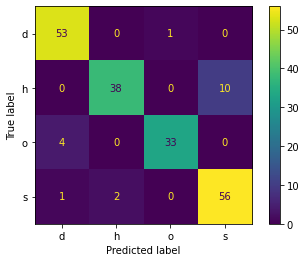

In [17]:
cm_1 = confusion_matrix(test_df[y], pred_model_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=model_1.classes_)
disp.plot()
plt.show()

## 6. Stochastic Gradient Descent Classifier
The two main hyperparameters we chose to tune are the 'loss' and 'penalty'. These two affects the training and the result the most.
- Hyperparameter 'loss' specifies which loss function to be used in the Gradient Descent Algorithm. Here, we tried 'hinge', 'log', 'modified_huber' and 'squared_hinge'.
- Hyperparameter 'penalty' is the regularization parameter. Here, we tried 'l2', 'l1' and 'elasticnet'.
- Hyperparameter 'random_state' is set to 'True' to avoid different result each time we train the model.
- Hyperparameter 'learning_rate' is set to the default 'optimal' to avoid the situations when it's too high or too small.
- Hyperparameter 'alpha' didn't improve the results much during our experiment, so we set it to the default value.
- We used GridSearch with 3-fold cross validation to try all 12 pairs of hyperparameters.
- We used function 'best_params_' to show us the best pair with the highest accuracy score.

In [18]:
sgd = SGDClassifier(random_state=True)
params_2 = {
    'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet']
}
model_2 = GridSearchCV(sgd, params_2, scoring='accuracy', cv=3)
model_2.fit(train_df[x],train_df[y].values.ravel())
print ('Best Hyperparameter Combination: {}\n'.format(model_2.best_params_))

Best Hyperparameter Combination: {'loss': 'hinge', 'penalty': 'l1'}



### Prediction & Accuracy
We then fed the 2 parameters back into our SGDCClassifer model.
- We have the accuracy '0.89'.
- Confusion matrix in colours, precision, recall and F1-score are also shown below.

In [19]:
model_2 = SGDClassifier(loss= 'hinge',  penalty = 'l1', random_state=True)
model_2.fit(train_df[x],train_df[y].values.ravel())
pred_model_2 = model_2.predict(test_df[x])
print(classification_report(test_df[y], pred_model_2))

              precision    recall  f1-score   support

           d       0.91      0.98      0.95        54
           h       0.89      0.85      0.87        48
           o       0.94      0.89      0.92        37
           s       0.90      0.90      0.90        59

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



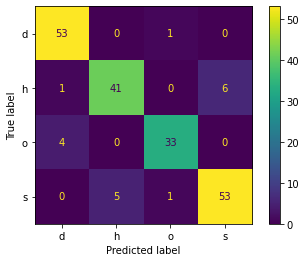

In [20]:
cm_2 = confusion_matrix(test_df[y], pred_model_2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model_2.classes_)
disp2.plot()
plt.show()

## 7. Conclusion
- Overall, SVC performs better with this data set than SGDClassifier with slightly higher accuracy, 0.91 over 0.89.
- By viewing F1-scores, we can see SGDClassifier actually performs better at classifying 'd' and 'o' but perfroms worse at classifying 'h' and 's' than SVC.
- By confusion matrix, both classifiers perform poorly at classifying 'h', maybe due to label 'h' has the least number of instances, 38 out of 325 instances.
- Since the performances of both classifiers are not different by much and our data set is quite imbalanced, if we collect more instances for label 'h' or for both label 'h' and 'o', the result might be different. However, we wouldn't know until we have a new balanced data set to build our new models.

## 8. References
- [Data Set Description](https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping)
- [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
- [Doc of sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Doc of sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)